In [1]:
import pandas as pd
import numpy as np
import quantstats as qs
from pandas_datareader import data
from pykrx import stock
import math
import math
import matplotlib.pyplot as plt

### BENFORD distribution

In [2]:
class benford():
    def __init__(self):
        self.BENFORD = [self.benford(i) for i in range(1, 10)]
        self.BENFORD2 = [self.benford(i) for i in range(10, 100)]
    
    def benford(self, n):
        return math.log10(n+1) - math.log10(n)
    
    def first_digit_test(self, df: pd.DataFrame, target_col: str):
        # get first digit
        df["first_digit"] = df[target_col].map(lambda x: int(str(abs(x*10000))[:1]))
        first_digit_frequency = (df[df.first_digit > 0]['first_digit']
                                     .value_counts(normalize=True)
                                     .reindex([i for i in range(1,10)])
                                     .replace(np.NaN, 0))

        # draw graph
        plt.bar([i for i in range(1,10)], first_digit_frequency, alpha=0.5, label='data', color='r')
        plt.bar([i for i in range(1,10)], self.BENFORD, alpha=0.3, label='benford', color='g')
        plt.legend(loc='upper right')
        plt.show()
        print("Sample size:", df.shape[0])
        
         # show conformity
        diff_mad = (first_digit_frequency - self.BENFORD).mad()
        print("Result (1st):")
        print(f"=> {diff_mad:.4f} ", end="")
        if diff_mad <= 0.006:
            print("Close conformity")
        elif 0.006 < diff_mad <= 0.012:
            print("Acceptable conformity")
        elif 0.012 < diff_mad <= 0.015:
            print("Marginally acceptable conformity")
        else:
            print("Noneconformity")
    
    def first_two_digits_test(self, df: pd.DataFrame, target_col: str):
        # get first two digits
        df["first_two_digits"] = df[target_col].map(lambda x: int(str(abs(x*10000))[:2].replace(".","0")))
        first_two_digits_frequency = (df[df.first_two_digits > 0]['first_two_digits']
                                      .value_counts(normalize=True)
                                      .reindex([i for i in range(10,100)])
                                      .replace(np.NaN, 0))

        # draw graph
        plt.bar([i for i in range(10,100)], first_two_digits_frequency, alpha=0.5, label='data2', color='r')
        plt.bar([i for i in range(10,100)], self.BENFORD2, alpha=0.3, label='benford2', color='g')
        plt.legend(loc='upper right')
        plt.show()
        print("Sample size:", df.shape[0])
        
        # show conformity
        diff_mad2 = (first_two_digits_frequency - self.BENFORD2).mad()
        print("Result (2nd):")
        print(f"=> {diff_mad2:.4f} ", end="")
        if diff_mad2 <= 0.0012:
            print("Close conformity")
        elif 0.0012 < diff_mad2 <= 0.0018:
            print("Acceptable conformity")
        elif 0.0018 < diff_mad2 <= 0.0022:
            print("Marginally acceptable conformity")
        else:
            print("Noneconformity")

### MADOFF Profit

sample size: 215


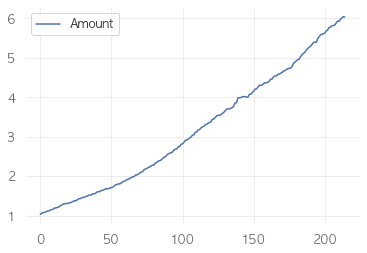

In [3]:
df_madoff = pd.read_csv("./data/madoff_returns.csv")
(df_madoff/100+1).cumprod().plot()
target_col = "Amount"
print("sample size:", df_madoff.shape[0])

### Madoff first digit test

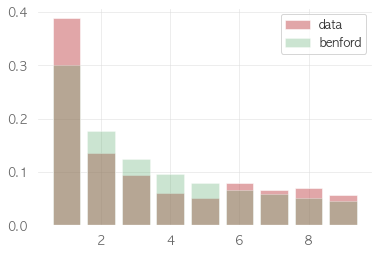

Sample size: 215
Result (1st):
=> 0.0302 Noneconformity


In [4]:
bf = benford()
bf.first_digit_test(df_madoff, "Amount")

### Madoff first two digits test

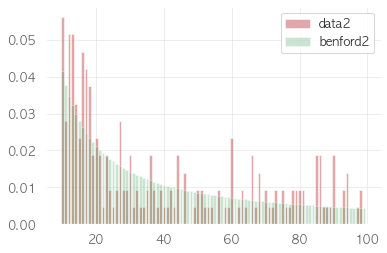

Sample size: 215
Result (2nd):
=> 0.0061 Noneconformity


In [5]:
bf.first_two_digits_test(df_madoff, "Amount")

### Stock profit

Sample size: 5755


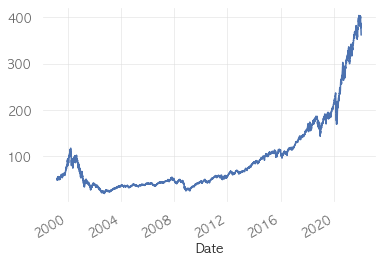

In [6]:
# S&P 500: ^GSPC
# NASDAQ 100: ^NDX 
df_stock = data.DataReader("QQQ", 
                     start='1900-1-1',
                     data_source='yahoo')
df_stock.columns = map(str.lower, df_stock.columns)
df_stock['date'] = df_stock.index
# df = df.groupby(pd.Grouper(freq='1W')).first()
df_stock["close"].plot()

# calculate returns
df_stock["log_returns"] = np.log(df_stock["close"]/df_stock["close"].shift(1))
df_stock["normal_returns"] = df_stock["close"]/df_stock["close"].shift(1)-1
df_stock.dropna(inplace=True)
target_col = "log_returns"
print("Sample size:", df_stock.shape[0])

In [7]:
# calculate returns
df_stock["log_returns"] = np.log(df_stock["close"]/df_stock["close"].shift(1))
df_stock["log_returns_wrong"] = np.log(df_stock["close"]/df_stock["close"].shift(1)+0.02)
df_stock.dropna(inplace=True)
target_col = "log_returns_wrong"

### Stock first digit test

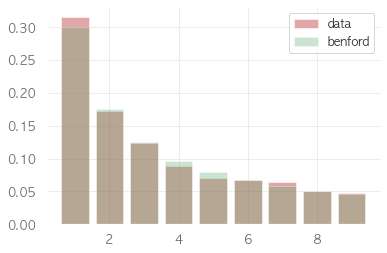

Sample size: 5754
Result (1st):
=> 0.0051 Close conformity


In [8]:
bf = benford()
bf.first_digit_test(df_stock, "log_returns")

### Stock first two digits test

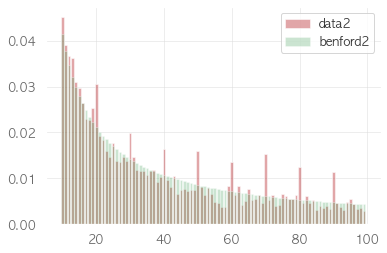

Sample size: 5754
Result (2nd):
=> 0.0019 Marginally acceptable conformity


In [9]:
bf.first_two_digits_test(df_stock, "log_returns")

### Wrong stock first digit test

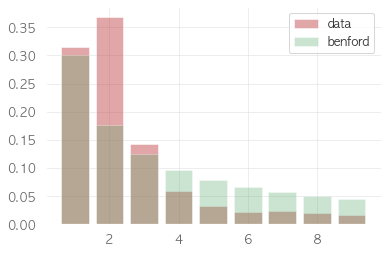

Sample size: 5754
Result (1st):
=> 0.0497 Noneconformity


In [10]:
bf.first_digit_test(df_stock, "log_returns_wrong")

### Wrong stock first two digits test

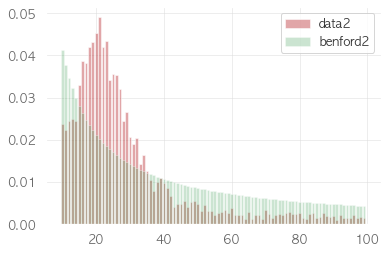

Sample size: 5754
Result (2nd):
=> 0.0064 Noneconformity


In [11]:
bf.first_two_digits_test(df_stock, "log_returns_wrong")